In [291]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.metrics import confusion_matrix, accuracy_score, \
    recall_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [292]:
sns.set_style("darkgrid")

In [293]:
pr_data = {
        'poc_rokov':  [3, 8, 9, 13, 3, 6, 11, 21, 1, 16],
        'prijem': [30, 57, 64, 72, 36, 43, 59, 90, 20, 83],
        }

pr = pd.DataFrame(data=pr_data)
display(pr)

,poc_rokov,prijem
0,3,30
1,8,57
2,9,64
3,13,72
4,3,36
5,6,43
6,11,59
7,21,90
8,1,20
9,16,83


In [294]:
model = LinearRegression().fit(np.array(pr["poc_rokov"]).reshape(-1, 1), np.array(pr["prijem"]).reshape(-1, 1))

pr["predicted"] = model.predict(np.array(pr["poc_rokov"]).reshape(-1, 1))
display(pr)
print(np.where(pr["prijem"] == pr["predicted"], True, False))

,poc_rokov,prijem,predicted
0,3,30,33.821399
1,8,57,51.508777
2,9,64,55.046252
3,13,72,69.196155
4,3,36,33.821399
5,6,43,44.433826
6,11,59,62.121204
7,21,90,97.495960
8,1,20,26.746447
9,16,83,79.808582


[False False False False False False False False False False]


In [295]:
pr1_data ={
    'poc_rokov': [10, 15, 20]
}

pr1 = pd.DataFrame(data=pr1_data)
pr1["prijem"] = model.predict(np.array(pr1["poc_rokov"]).reshape(-1, 1))
display(pr1)

,poc_rokov,prijem
0,10,58.583728
1,15,76.271106
2,20,93.958484


In [296]:
state = pd.read_csv("stateX77.csv", delimiter=",")

state = pd.DataFrame(state)
display(state)


,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
0,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,365,6315,1.5,69.31,11.3,66.7,152,566432
2,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,21198,5114,1.1,71.71,10.3,62.6,20,156361
5,2541,4884,0.7,72.06,6.8,63.9,166,103766
6,3100,5348,1.1,72.48,3.1,56.0,139,4862
7,579,4809,0.9,70.06,6.2,54.6,103,1982
8,8277,4815,1.3,70.66,10.7,52.6,11,54090
9,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [297]:
X = state[['Illiteracy', 'Life Exp']]
Y = state['Murder']
model1 = LinearRegression().fit(X, Y)

state["Murder_predict"] = model1.predict(X)
display(state)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,Murder_predict
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,12.300166
1,365,6315,1.5,69.31,11.3,66.7,152,566432,10.545186
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,9.306608
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,9.362270
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,5.935944
5,2541,4884,0.7,72.06,6.8,63.9,166,103766,4.493082
6,3100,5348,1.1,72.48,3.1,56.0,139,4862,4.746621
7,579,4809,0.9,70.06,6.2,54.6,103,1982,8.033364
8,8277,4815,1.3,70.66,10.7,52.6,11,54090,8.008879
9,4931,4091,2.0,68.54,13.9,40.6,60,58073,12.862335


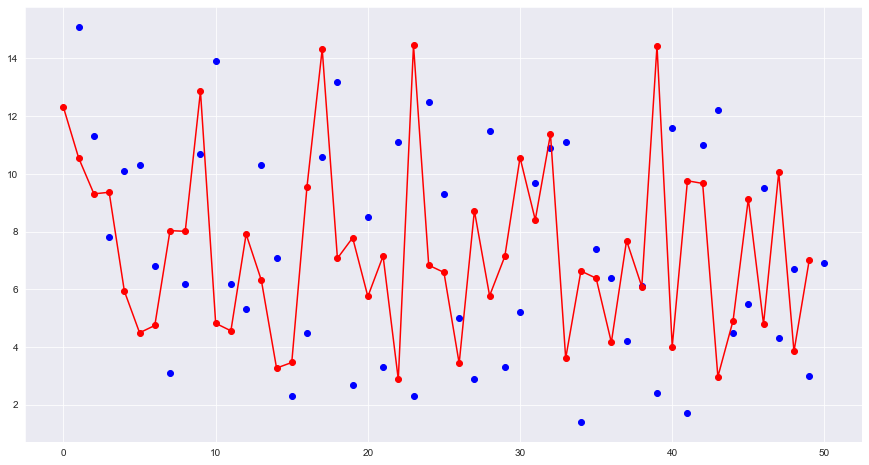

In [298]:
x = np.linspace(start=1, stop=state['Murder'].count(), num=50).astype(np.int)

plt.figure(figsize=(15, 8))
plt.plot(x, np.array(state["Murder"]), 'ob')
plt.plot(state["Murder_predict"], 'o-r')
plt.show()

In [299]:
CO2 = pd.DataFrame(pd.read_csv("CO2.csv", delimiter=","))

del CO2["Plant"]
display(CO2)

encoder = LabelEncoder()
for i in range(0, 2):
    CO2[CO2.columns[i]] = encoder.fit_transform(CO2[CO2.columns[i]])

np.random.seed(8)
myFormula = [CO2[["Type", "conc", "uptake"]],CO2["Treatment"]]
X_train, X_test, y_train, y_test = \
    train_test_split(myFormula[0], myFormula[1], test_size=0.3, random_state=42)

,Type,Treatment,conc,uptake
0,Quebec,nonchilled,95,16.0
1,Quebec,nonchilled,175,30.4
2,Quebec,nonchilled,250,34.8
3,Quebec,nonchilled,350,37.2
4,Quebec,nonchilled,500,35.3
...,...,...,...,...
79,Mississippi,chilled,250,17.9
80,Mississippi,chilled,350,17.9
81,Mississippi,chilled,500,17.9
82,Mississippi,chilled,675,18.9


,Type,Treatment,conc,uptake
0,1,1,95,16.0
1,1,1,175,30.4
2,1,1,250,34.8
3,1,1,350,37.2
4,1,1,500,35.3
...,...,...,...,...
79,0,0,250,17.9
80,0,0,350,17.9
81,0,0,500,17.9
82,0,0,675,18.9


In [300]:
co2_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)
print(confusion_matrix(y_train, co2_tree.predict(X_train), labels=[1, 0]))

[[28  1]
 [ 0 29]]


[Text(488.25, 1019.25, 'X[2] <= 21.95\ngini = 0.5\nsamples = 58\nvalue = [29, 29]'), Text(223.2, 883.35, 'X[1] <= 212.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'), Text(167.39999999999998, 747.45, 'X[2] <= 10.95\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'), Text(111.6, 611.55, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(223.2, 611.55, 'X[1] <= 135.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'), Text(111.6, 475.65, 'X[2] <= 13.9\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'), Text(55.8, 339.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(167.39999999999998, 339.75, 'X[2] <= 15.2\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(111.6, 203.85000000000002, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(223.2, 203.85000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(334.79999999999995, 475.65, 'X[2] <= 18.6\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'), Text(279.0, 339.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'), Text(390.59999999999997, 339.75, 'X[2] <= 20.2\ngi

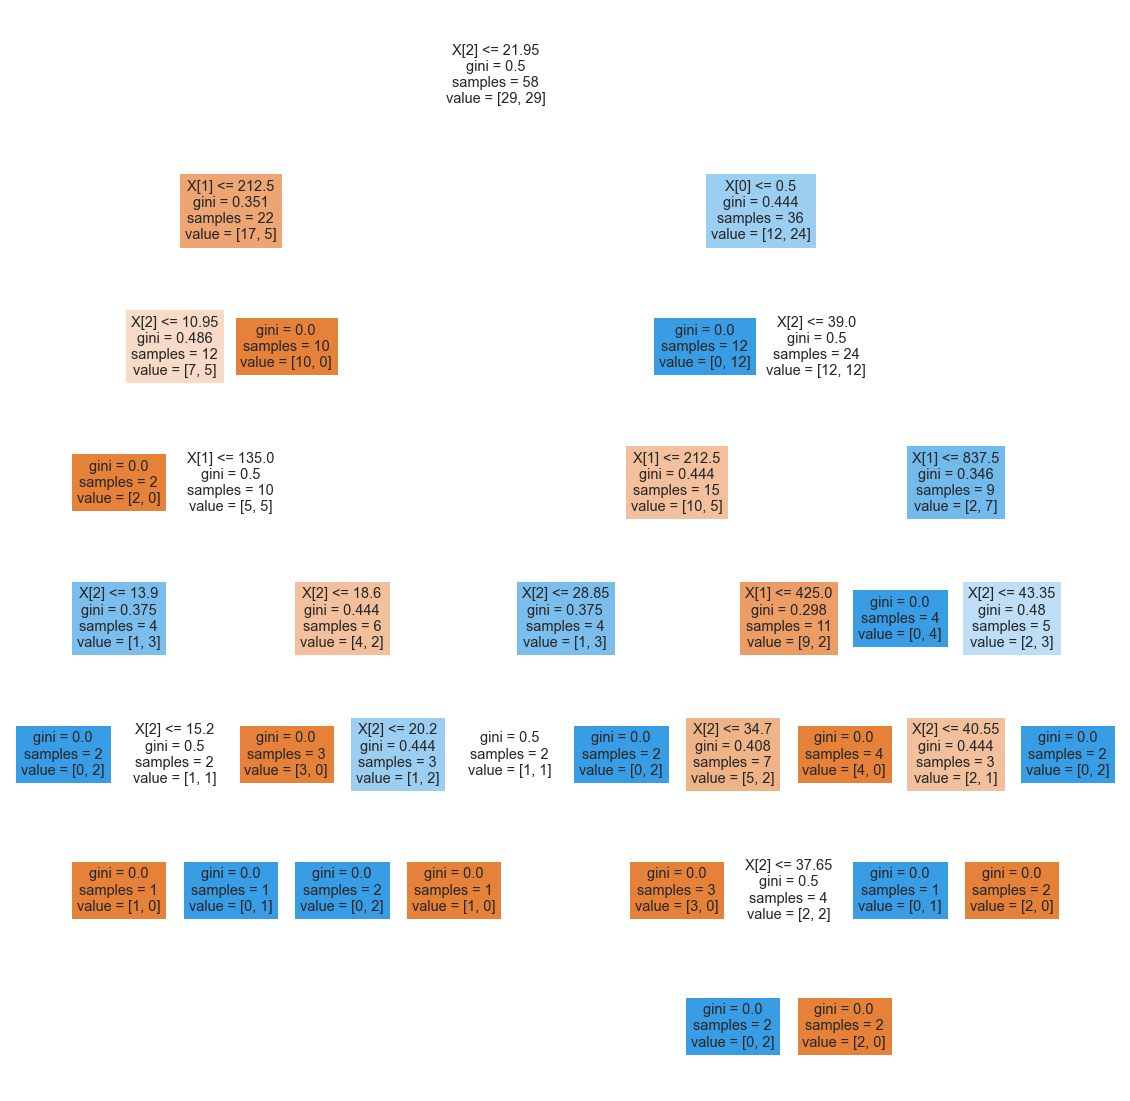

In [301]:
plt.figure(figsize=(20, 20))
print(tree.plot_tree(co2_tree, filled=True))
plt.show()

In [302]:
testPred = co2_tree.predict(X_test)
print(confusion_matrix(y_test, testPred))

print(f"accuracy: {accuracy_score(y_test, testPred)}")
print(f"recall: {recall_score(y_test, testPred)}")
print(f"precision: {precision_score(y_test, testPred)}")
print(f"f1: {f1_score(y_test, testPred)}")


[[10  3]
 [ 2 11]]
accuracy: 0.8076923076923077
recall: 0.8461538461538461
precision: 0.7857142857142857
f1: 0.8148148148148148


In [303]:
NB = GaussianNB().fit(X_train.iloc[:, 1:], y_train)

NB_predict = NB.predict(X_test.iloc[:, 1:])
print(confusion_matrix(y_test, NB_predict))

print(f"accuracy: {accuracy_score(y_test, NB_predict)}")
print(f"recall: {recall_score(y_test, NB_predict)}")
print(f"precision: {precision_score(y_test, NB_predict)}")
print(f"f1: {f1_score(y_test, NB_predict)}")

[[ 9  4]
 [ 3 10]]
accuracy: 0.7307692307692307
recall: 0.7692307692307693
precision: 0.7142857142857143
f1: 0.7407407407407408


In [309]:
data = [CO2[["conc","Treatment","uptake"]], CO2["Type"]]
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.3, random_state=35)

del X_train["Treatment"]
del X_test["Treatment"]

discretization = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
train_data =discretization.fit_transform(X_train)
NB = GaussianNB().fit(train_data, y_train)
NB_predict_1 = NB.predict(X_test,)
print(confusion_matrix(y_test, NB_predict_1, labels=[1, 0]))

print(f"accuracy: {accuracy_score(y_test, NB_predict_1)}")
print(f"recall: {recall_score(y_test, NB_predict_1)}")
print(f"precision: {precision_score(y_test, NB_predict_1)}")
print(f"f1: {f1_score(y_test, NB_predict_1)}")

[[ 6  7]
 [ 3 10]]
accuracy: 0.6153846153846154
recall: 0.46153846153846156
precision: 0.6666666666666666
f1: 0.5454545454545455


In [316]:
co2_training, co2_test, co2_trainLabels, co2_testLabel  = train_test_split(myFormula[0],
                                                    myFormula[1], test_size=0.2, random_state=42)

model_knn = KNeighborsClassifier(n_neighbors=2).fit(co2_training, co2_trainLabels)
co2_pred = model_knn.predict(co2_test,)

print(np.where(co2_testLabel == co2_pred, True, False))

print(confusion_matrix(co2_testLabel, co2_pred))

print(f"accuracy: {accuracy_score(co2_testLabel, co2_pred)}")
print(f"recall: {recall_score(co2_testLabel, co2_pred)}")
print(f"precision: {precision_score(co2_testLabel, co2_pred)}")
print(f"f1: {f1_score(co2_testLabel, co2_pred)}")


[ True False False  True  True  True False False False  True  True False
  True  True  True False  True]
[[8 0]
 [7 2]]
accuracy: 0.5882352941176471
recall: 0.2222222222222222
precision: 1.0
f1: 0.3636363636363636
